# Data Science in Economics and Business - Class Project
In this class project, you are supposed to work with GDP data taken from the International Monetary Fund.

**IMPORTANT:** <br>
Please enter the matriculation number of all group members here:
1. XXXXXX
2. YYYYYY
3. ZZZZZZ

In this class project, you will use the different techniques taught in the course: data handling, data visualization, and machine learning.

First load the necessary packages. <br>
If you want to use additional libraries you can add them to the following cell:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
#import folium
#from folium.plugins import MarkerCluster

# Problem 1 - Data Handling
The basis of your work will be the following GDP dataset:

In [3]:
gdp = pd.read_csv("GDP_IMF.csv", sep=";")
gdp.head(5)

,Country,year,GDP
0,Afghanistan,1992,no data
1,Albania,1992,0.843
2,Algeria,1992,49.217
3,Andorra,1992,no data
4,Angola,1992,9.395


#### a)
As you can see, there are many missing values in the data. <br>
Before you can continue, you need to handle them. Proceed as follows:
- Delete those countries with no data at all (if any)
- Either delete the missing years for each country or use the years close by to approximate the missing value <br> *Example: Year 2004 is missing, but 2003 and 2005 are available; use the mean of GDP in 2003 and 2005 to replace missing year 2004.*

In [4]:
pivot_gdp = gdp.pivot(index='Country', columns='year', values='GDP')

In [5]:
pivot_gdp.head()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Country,,,,,,,,,,,,,,,,,,,,,
ASEAN-5,460.862,515.309,588.397,682.591,758.554,713.871,467.853,553.827,587.507,564.381,...,2782.318,2610.812,2884.173,3133.939,3369.484,3620.243,3878.648,4148.253,4430.685,4731.984
Advanced economies,21156.842,21322.601,22895.932,25360.404,25538.353,25041.07,25132.372,26465.873,26923.495,26648.687,...,52037.09,51000.154,56628.973,57582.432,60469.069,62642.799,65153.074,67753.068,70310.193,72991.719
Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,18.876,20.136,no data,no data,no data,no data,no data,no data,no data,no data
Africa (Region),604.244,605.136,593.589,705.236,787.203,816.984,825.778,683.407,703.55,681.515,...,2540.86,2455.608,2746.799,2974.59,2994.577,3142.775,3383.827,3632.868,3903.836,4212.904
Albania,0.843,1.461,2.361,2.882,3.2,2.259,2.56,3.209,3.483,3.928,...,15.399,15.161,18.31,18.509,20.177,20.847,21.932,23.086,24.217,25.46


In [6]:
pivot_gdp.replace('no data', np.nan, inplace=True)
pivot_gdp['NaN_count'] = pivot_gdp.isna().sum(axis=1)

In [7]:
# There is no country with no entries at all
pivot_gdp[pivot_gdp['NaN_count'] == 37]

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count
Country,,,,,,,,,,,,,,,,,,,,,


In [8]:
# Alle Länder mit NaN count >= 9 werden rausgeschmissen (haben weniger als 75% der Daten über die Zeit gesehen)
gdp_clean = pivot_gdp[pivot_gdp['NaN_count'] < 9]

In [9]:
gdp_clean.head()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count
Country,,,,,,,,,,,,,,,,,,,,,
ASEAN-5,460.862,515.309,588.397,682.591,758.554,713.871,467.853,553.827,587.507,564.381,...,2610.812,2884.173,3133.939,3369.484,3620.243,3878.648,4148.253,4430.685,4731.984,0
Advanced economies,21156.842,21322.601,22895.932,25360.404,25538.353,25041.07,25132.372,26465.873,26923.495,26648.687,...,51000.154,56628.973,57582.432,60469.069,62642.799,65153.074,67753.068,70310.193,72991.719,0
Africa (Region),604.244,605.136,593.589,705.236,787.203,816.984,825.778,683.407,703.55,681.515,...,2455.608,2746.799,2974.59,2994.577,3142.775,3383.827,3632.868,3903.836,4212.904,0
Albania,0.843,1.461,2.361,2.882,3.2,2.259,2.56,3.209,3.483,3.928,...,15.161,18.31,18.509,20.177,20.847,21.932,23.086,24.217,25.46,0
Algeria,49.217,50.963,42.426,42.066,46.941,48.178,48.188,48.845,54.749,54.745,...,145.656,163.138,195.415,206.007,210.86,218.341,225.09,228.991,232.992,0


In [10]:
gdp_clean2 = gdp_clean.apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [11]:
final_gdp = gdp_clean2.fillna(gdp_clean2.rolling(5, min_periods=2, center=True, axis=1).mean())

In [12]:
final_gdp2 = final_gdp.interpolate(method='linear', axis=1, limit_direction='both')


In [13]:
final_gdp2.head()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count
Country,,,,,,,,,,,,,,,,,,,,,
ASEAN-5,460.862,515.309,588.397,682.591,758.554,713.871,467.853,553.827,587.507,564.381,...,2610.812,2884.173,3133.939,3369.484,3620.243,3878.648,4148.253,4430.685,4731.984,0.0
Advanced economies,21156.842,21322.601,22895.932,25360.404,25538.353,25041.070,25132.372,26465.873,26923.495,26648.687,...,51000.154,56628.973,57582.432,60469.069,62642.799,65153.074,67753.068,70310.193,72991.719,0.0
Africa (Region),604.244,605.136,593.589,705.236,787.203,816.984,825.778,683.407,703.550,681.515,...,2455.608,2746.799,2974.590,2994.577,3142.775,3383.827,3632.868,3903.836,4212.904,0.0
Albania,0.843,1.461,2.361,2.882,3.200,2.259,2.560,3.209,3.483,3.928,...,15.161,18.310,18.509,20.177,20.847,21.932,23.086,24.217,25.460,0.0
Algeria,49.217,50.963,42.426,42.066,46.941,48.178,48.188,48.845,54.749,54.745,...,145.656,163.138,195.415,206.007,210.860,218.341,225.090,228.991,232.992,0.0


In [14]:
#Short check if there a still NaN-Values
final_gdp2['NaN_count2'] = final_gdp2.isna().sum(axis=1)
final_gdp2[final_gdp2['NaN_count2'] > 0]

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2021,2022,2023,2024,2025,2026,2027,2028,NaN_count,NaN_count2
Country,,,,,,,,,,,,,,,,,,,,,


#### b)
We are only interested in the data on a country level and for years already passed. <br>
The dataset, however, also contains information on whole regions such as the EU or G7. <br>
It also contains predictions for GDP in the upcoming years. <br>
Delete these observations from the data. <br>
*Hint: Get a list of all unique values of the Country column.*

In [15]:
#drop year in the future
final_gdp2.drop(columns=[2023,2024,2025,2026,2027,2028], axis=0, inplace=True)

In [16]:
final_gdp2.head()

year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2015,2016,2017,2018,2019,2020,2021,2022,NaN_count,NaN_count2
Country,,,,,,,,,,,,,,,,,,,,,
ASEAN-5,460.862,515.309,588.397,682.591,758.554,713.871,467.853,553.827,587.507,564.381,...,2177.688,2285.138,2463.014,2631.963,2782.318,2610.812,2884.173,3133.939,0.0,0
Advanced economies,21156.842,21322.601,22895.932,25360.404,25538.353,25041.070,25132.372,26465.873,26923.495,26648.687,...,45449.127,46671.191,48687.936,51537.607,52037.090,51000.154,56628.973,57582.432,0.0,0
Africa (Region),604.244,605.136,593.589,705.236,787.203,816.984,825.778,683.407,703.550,681.515,...,2419.438,2301.875,2316.143,2479.852,2540.860,2455.608,2746.799,2974.590,0.0,0
Albania,0.843,1.461,2.361,2.882,3.200,2.259,2.560,3.209,3.483,3.928,...,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.509,0.0,0
Algeria,49.217,50.963,42.426,42.066,46.941,48.178,48.188,48.845,54.749,54.745,...,165.979,160.034,167.498,174.868,171.673,145.656,163.138,195.415,0.0,0


In [17]:
#generate list to go through and create a blacklist
final_gdp2.index.values.tolist()

['ASEAN-5',
 'Advanced economies',
 'Africa (Region)',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia and Pacific',
 'Australia',
 'Australia and New Zealand',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean',
 'Central African Republic',
 'Central America',
 'Central Asia and the Caucasus',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep. of the',
 'Congo, Republic of ',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia',
 'Eastern Europe ',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Emerging and Develo

In [18]:
blacklist = ['ASEAN-5', 'Advanced economies', 'Africa (Region)', 'Asia and Pacific', 'Australia and New Zealand', 'Central America', 'Central Asia and the Caucasus',  'Emerging and Developing Asia', 'Emerging and Developing Europe', 'Emerging market and developing economies',  'Euro area', 'Europe', 'European Union', 'Latin America and the Caribbean', 'Major advanced economies (G7)',  'Middle East (Region)', 'Middle East and Central Asia',  'North Africa', 'North America',  'Other advanced economies', 'Pacific Islands ',  'South America', 'South Asia', 'Southeast Asia',  'Sub-Saharan Africa (Region) ',  'Sub-Saharan Africa',  'West Bank and Gaza', 'Western Europe', 'Western Hemisphere (Region)', 'World']

In [19]:
final_gdp3 = final_gdp2.drop(blacklist)

# Problem 2 - Data Visualization
#### a)
To get some first insights in the data, create meaningful plots. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

In [20]:
# Insert your code here.

#### b)
Pick a year with as little missing values as possible. <br>
For this year, create an interactive map with `folium` that tells you the GDP in the country in the given year. <br>
*Hint: Be cautious with country names.*

In [21]:
# Insert your code here.

# Problem 3 - Supervised Machine Learning
#### a)
First, try to predict the GDP in a given year and in a given country using the data from the past years. <br>
Report the performance (measured in mean squared error) for different numbers of lags. 

In [22]:
# Insert your code here.
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
df_supervised = pd.DataFrame.transpose(final_gdp3)
df_supervised = df_supervised.drop(["NaN_count", "NaN_count2"])
df_supervised_norm = (df_supervised - df_supervised.mean())/df_supervised.std()
df_supervised_norm[df_supervised_norm.isnull().any(axis=1)]

Country,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,


In [24]:
model_lin = LinearRegression(fit_intercept = True)


In [25]:
countrys = df_supervised_norm.columns.values

In [26]:
max_lag = 5
Results = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys:
  
    work_df = pd.DataFrame(df_supervised_norm[country])
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df[country].shift(lag)
        X = work_df[["GDP_lag" + str(l) for l in range(1, lag+1)]].iloc[lag:]
        y = work_df[country].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_lin.fit(X_train, y_train)
        prediction_lin = model_lin.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_lin)}
        Results.loc[len(Results)] = new_row

#model_fit mehrmals laufen lassen ?? Siehe Skript letzte Übung Bitcoins

In [27]:
Results = Results.groupby(["Country"]).agg('sum')

In [28]:
Results.head()

,MSE_lag1,MSE_lag2,MSE_lag3,MSE_lag4,MSE_lag5
Country,,,,,
Albania,0.011117,0.014210,0.007611,0.024529,0.036404
Algeria,0.081713,0.083712,0.046907,0.052259,0.128371
Andorra,0.041531,0.028305,0.077305,0.134768,0.046322
Angola,0.235800,0.240116,0.125731,0.153186,0.338172
Antigua and Barbuda,0.221158,0.224911,0.194753,0.193524,0.179940


In [29]:
print("Average MSE for 1 lag is: ", pd.Series.mean(Results["MSE_lag1"]))
print("Average MSE for 2 lags is: ", pd.Series.mean(Results["MSE_lag2"]))
print("Average MSE for 3 lags is: ", pd.Series.mean(Results["MSE_lag3"]))
print("Average MSE for 4 lags is: ", pd.Series.mean(Results["MSE_lag4"]))
print("Average MSE for 5 lags is: ", pd.Series.mean(Results["MSE_lag5"]))

Average MSE for 1 lag is:  0.09277597695663982
Average MSE for 2 lags is:  0.09783193305820276
Average MSE for 3 lags is:  0.06820496431817992
Average MSE for 4 lags is:  0.08190354399850885
Average MSE for 5 lags is:  0.11165447408767633


#### b)
Now, see if you can improve the prediction with additional data. <br>
In this task, you are supposed to be creative and use your intuition. What could be important predictors? Think of, for example:
- Country characteristics such as population, unemployment rates etc. <br> *Hint: You can search for official statistics, e.g., from OECD.*
- Major historical events such as wars, natural disasters etc. <br> *Hint: You can make dummy variables if such an event happened for given country and year.*
- Geographical information such as continent.

*Note: It is well possible that you can't find data on very small countries. If you don't find data for some countries, you can drop them.*

# Prepocessing CSV Files

In [30]:
# Insert your code here.
imports = pd.read_csv("TDS1/Importe.csv", sep=",")
exports = pd.read_csv("TDS1/Exporte.csv", sep=",")
population = pd.read_csv("TDS1/Populations.csv", sep = ",")
unemployment = pd.read_csv("TDS1/Arbeitslosenraten.csv", sep = ",")
nat_disasters = pd.read_csv("TDS1/natural-disasters.csv", sep = ",")

# Quellen noch rausschreiben

# Imports

In [31]:
imports.drop(imports.iloc[:, 1:36], inplace = True, axis = 1)
imports.drop(["Unnamed: 67"], inplace = True, axis = 1)
imports.rename(columns={'Country Name': 'Country'}, inplace=True)
imports.set_index(keys='Country', inplace=True)

In [32]:
# Investigate NaN
imports['NaN_count'] = imports.isna().sum(axis=1)

In [33]:
# Drop all rows with >= 9 NaN
imports_clean = imports[imports['NaN_count'] < 9]

In [34]:
imports_clean.drop(['NaN_count'], axis=1, inplace=True)
imports_clean = imports_clean.fillna(imports_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
imports_clean = imports_clean.interpolate(method='linear', axis=1, limit_direction='both')

/tmp/ipykernel_12401/1395835386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imports_clean.drop(['NaN_count'], axis=1, inplace=True)


# Exports

In [35]:
exports.drop(exports.iloc[:, 1:36], inplace = True, axis = 1)
exports.drop(["Unnamed: 67"], inplace = True, axis = 1)
exports.rename(columns={'Country Name': 'Country'}, inplace=True)
exports.set_index(keys='Country', inplace=True)

In [36]:
# Investigate NaN
exports['NaN_count'] = exports.isna().sum(axis=1)

In [37]:
# Drop all rows with >= 9 NaN
exports_clean = exports[exports['NaN_count'] < 9]

In [38]:
exports_clean.drop(['NaN_count'], axis=1, inplace=True)

/tmp/ipykernel_12401/3056136356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exports_clean.drop(['NaN_count'], axis=1, inplace=True)


In [39]:
exports_clean = exports_clean.fillna(exports_clean.rolling(5, min_periods=2, center=True, axis=1).mean())
exports_clean = exports_clean.interpolate(method='linear', axis=1, limit_direction='both')

# Population

In [40]:
population.drop(population.iloc[:, 1:36], inplace = True, axis = 1)
population.drop(["Unnamed: 67"], inplace = True, axis = 1)
population.rename(columns={'Country Name': 'Country'}, inplace=True)
population.set_index(keys='Country', inplace=True)

In [41]:
# Investigate NaN - No NaN values in the dataset
population['NaN_count'] = population.isna().sum(axis=1)


In [42]:
population = population.drop(columns=["NaN_count"])

# Unemployment

In [43]:
unemployment.drop(unemployment.iloc[:, 1:5], inplace = True, axis = 1)
unemployment.drop(["Flag Codes"], inplace = True, axis = 1)
unemployment_piv = unemployment.pivot(index='LOCATION', columns='TIME', values='Value')

In [44]:
unemployment_piv
# hat nur 35 verwertbare Länder - evtl. am Ende nutzen und Einfluss auf Regression für diese 35 Länder messen

TIME,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
LOCATION,,,,,,,,,,,,,,,,,,,,,
AUS,10.728140,10.874670,9.722190,8.472281,8.506114,8.362488,7.677429,6.873791,6.285546,6.742173,...,5.661940,6.077244,6.056423,5.710809,5.595881,5.307670,5.166878,6.463281,5.113611,3.705759
AUT,NaN,3.958333,4.241667,4.241667,4.733333,4.733333,4.725000,4.150000,3.933333,3.983333,...,5.725000,6.033333,6.150000,6.450000,5.925000,5.208333,4.841667,6.025000,6.200000,4.758333
BEL,7.091667,8.625000,9.750000,9.675000,9.541667,9.216666,9.341666,8.400000,6.875000,6.591667,...,8.550000,8.658334,8.650000,7.850000,7.100000,5.958333,5.366667,5.541667,6.275000,5.575000
CAN,11.191670,11.400000,10.416670,9.508333,9.608334,9.116667,8.283334,7.591667,6.816667,7.216667,...,7.150000,7.033333,6.941667,7.025000,6.425000,5.841667,5.691667,9.691667,7.541667,5.300000
CHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.747292,4.829988,4.800639,4.919180,4.797587,4.714414,4.394452,4.815328,5.098192,4.299916
CHL,6.665000,6.542500,7.815000,7.302500,6.325000,6.115000,6.395000,10.137500,9.667500,9.852500,...,6.082220,6.495096,6.328377,6.684913,6.965175,7.376639,7.222640,10.770240,8.861450,7.878028
COL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.742500,9.205000,8.950833,9.226666,9.295834,9.529166,10.370830,15.864170,13.810830,11.218330
CRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.386163,9.617385,9.612973,9.537852,9.071724,10.264050,11.755390,19.606880,16.433370,12.218830
CZE,NaN,4.308333,4.291667,4.008333,3.891667,4.775000,6.466667,8.700000,8.775000,8.125000,...,6.966667,6.116667,5.058333,3.966667,2.908333,2.266667,2.016667,2.550000,2.808333,2.400000


# Natural disasters

In [45]:
nat_disasters = nat_disasters[["Country name", "Year", "Number of total people affected by drought"]]
nat_disasters.rename(columns={'Country name': 'Country'}, inplace=True)
nat_dis_piv = nat_disasters.pivot(index='Country', columns='Year', values='Number of total people affected by drought')


In [46]:
nat_dis_piv.drop(nat_dis_piv.iloc[:, 0:92], inplace = True, axis = 1)

# Wenn NaN Eintragung dann bedeutet das, dass keine Naturkatastrophe stattgefunden hat, wir ersetzen mit "0 Betroffenen" damit wir die Variable als numerischen Regressor benutzen können
# oder alternativ könnten wir es auch noch in eine kategorische Dummy variable umwandeln
nat_dis_piv.fillna(0, inplace=True)

In [47]:
nat_dis_piv.head(3)

Year,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2580000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13500000.0,0.0,0.0,11000000.0,0.0
Africa,7000000.0,2346507.0,1200000.0,1811994.0,4942000.0,1477100.0,236700.0,36019545.0,231290.0,13054558.0,...,5080000.0,6795326.0,30331228.0,11641000.0,16561874.0,1226600.0,6983000.0,21526000.0,34062500.0,31356261.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# MATCH THE COUNTRY NAMES
# 1. Clean all new dataframes of the blacklist
# 1. Handle NaNs
# 2. Ensure that the column with the country names is called "country"
# 3. Standardize country names using fuzzywuzzy, a string matching library in python.
#    A warning is printed if the matched name has a similarity score below 80%, also we use copies of the original dataframes

from fuzzywuzzy import process

def match_countries(df, countries):
    df_copy = df.copy()
    matches = []
    for country in df_copy.index:
        match, score = process.extractOne(country, countries)
        if score < 90:
            continue
            #print(f"Low match score: {country} matched with {match} with score {score}")
        elif score < 99:
            print(f"Warning! Middle match score: {country} matched with {match} with score {score}")
            matches.append(match)
            df_copy = df_copy.rename(index={country : match})
        else:
            matches.append(match)
            df_copy = df_copy.rename(index={country : match})
    df_copy = df_copy[df_copy.index.isin(matches)]
    return df_copy

countries = final_gdp3.index.unique()

print("Importe:")
imp_clean_copy = match_countries(imports_clean, countries)
print("Exporte:")
exp_clean_copy = match_countries(exports_clean, countries)
print("Nat_Dis:")
nat_dis_clean_copy = match_countries(nat_dis_piv, countries)
print("Population:")
pop_clean_copy = match_countries(population, countries)
#df5_copy = match_countries(df5, countries)


/home/neles/.cache/pypoetry/virtualenvs/test-w-UEnm5h-py3.10/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Importe:
Warning! Middle match score: China matched with China, People's Republic of with score 90
Warning! Middle match score: Congo, Rep. matched with Congo, Republic of  with score 90
Warning! Middle match score: Caribbean small states matched with Caribbean with score 90
Warning! Middle match score: East Asia & Pacific (excluding high income) matched with East Asia with score 90
Warning! Middle match score: East Asia & Pacific matched with East Asia with score 90
Warning! Middle match score: Egypt, Arab Rep. matched with Egypt with score 90
Warning! Middle match score: Hong Kong SAR, China matched with Hong Kong SAR with score 90
Warning! Middle match score: St. Kitts and Nevis matched with Saint Kitts and Nevis with score 90
Warning! Middle match score: Korea, Rep. matched with Korea, Republic of with score 90
Warning! Middle match score: Latin America & Caribbean (excluding high income) matched with Caribbean with score 90
Warning! Middle match score: Latin America & Caribbean ma

In [49]:
final_gdp3 = final_gdp3.drop(columns=["NaN_count", "NaN_count2"])

In [50]:
# Normalize the numerical data (Sollten wir in der a) dann auch noch machen!!!!)

imp_clean_copy_norm = (imp_clean_copy - imp_clean_copy.mean())/imp_clean_copy.std()
exp_clean_copy_norm = (exp_clean_copy - exp_clean_copy.mean())/exp_clean_copy.std()
nat_dis_clean_copy_norm = (nat_dis_clean_copy - nat_dis_clean_copy.mean())/nat_dis_clean_copy.std()
pop_clean_copy_norm = (pop_clean_copy - pop_clean_copy.mean())/pop_clean_copy.std()
final_gdp3_norm = (final_gdp3 - final_gdp3.mean())/final_gdp3.std()

In [51]:
#Ensure type of all Column Names is identical (integer)

imp_clean_copy_norm.columns = imp_clean_copy_norm.columns.astype(int)
exp_clean_copy_norm.columns = exp_clean_copy_norm.columns.astype(int)
nat_dis_clean_copy_norm.columns = nat_dis_clean_copy_norm.columns.astype(int)
pop_clean_copy_norm.columns = pop_clean_copy_norm.columns.astype(int)
final_gdp3_norm.columns = final_gdp3_norm.columns.astype(int)

In [ ]:
final_gdp3_norm.index.value_counts().to_list()

In [109]:
def drop_duplicate_indices(df):
    df_reset = df.reset_index()
    country_counts = df_reset['Country'].value_counts()
    unique_countries = country_counts[country_counts == 1].index
    df_unique = df_reset[df_reset['Country'].isin(unique_countries)]
    df_unique.set_index('Country', inplace=True)

    return df_unique


In [118]:
imp_clean_copy_norm2 = drop_duplicate_indices(imp_clean_copy_norm)
exp_clean_copy_norm2 = drop_duplicate_indices(exp_clean_copy_norm)
nat_dis_clean_copy_norm2 = drop_duplicate_indices(nat_dis_clean_copy_norm)
pop_clean_copy_norm2 = drop_duplicate_indices(pop_clean_copy_norm)
final_gdp3_norm2 = drop_duplicate_indices(final_gdp3_norm)

In [119]:
# Exclude all countries that are not in all dfs
all_countries = set(imp_clean_copy_norm2.index).intersection(exp_clean_copy_norm2.index, nat_dis_clean_copy_norm2.index, pop_clean_copy_norm2.index, final_gdp3_norm2.index)

final_gdp3_norm2 = final_gdp3_norm2[final_gdp3_norm2.index.isin(all_countries)]
imp_clean_copy_norm2 = imp_clean_copy_norm2[imp_clean_copy_norm2.index.isin(all_countries)]
exp_clean_copy_norm2 = exp_clean_copy_norm2[exp_clean_copy_norm2.index.isin(all_countries)]
nat_dis_clean_copy_norm2 = nat_dis_clean_copy_norm2[nat_dis_clean_copy_norm2.index.isin(all_countries)]
pop_clean_copy_norm2 = pop_clean_copy_norm2[pop_clean_copy_norm2.index.isin(all_countries)]

In [120]:
# Sort index in all dataframes
imp_clean_copy_norm2.sort_index(inplace=True)
exp_clean_copy_norm2.sort_index(inplace=True)
nat_dis_clean_copy_norm2.sort_index(inplace=True)
pop_clean_copy_norm2.sort_index(inplace=True)
final_gdp3_norm2.sort_index(inplace=True)

In [121]:
#Concatenate Frames with multiindex
data = pd.concat([final_gdp3_norm2, imp_clean_copy_norm2, exp_clean_copy_norm2, nat_dis_clean_copy_norm2, pop_clean_copy_norm2], keys=["GDP", "Exports", "Imports", "Nat_Dis", "Population"])

In [52]:
#Concatenate Frames with multiindex
data = pd.concat([final_gdp3_norm, imp_clean_copy_norm, exp_clean_copy_norm, nat_dis_clean_copy_norm, pop_clean_copy_norm], keys=["GDP", "Exports", "Imports", "Nat_Dis", "Population"])

In [53]:
data

1992      1993      1994      1995  \
           Country                                                       
GDP        Albania             -0.230215 -0.223016 -0.222707 -0.227150   
           Algeria             -0.160710 -0.157308 -0.173315 -0.183059   
           Andorra             -0.229289 -0.222980 -0.223783 -0.228719   
           Angola              -0.217928 -0.215904 -0.219497 -0.223420   
           Antigua and Barbuda -0.230710 -0.224245 -0.224892 -0.229744   
...                                  ...       ...       ...       ...   
Population Kosovo              -0.245004 -0.245220 -0.245428 -0.245655   
           Yemen               -0.193186 -0.191981 -0.190754 -0.189629   
           South Africa        -0.079919 -0.079405 -0.078975 -0.078635   
           Zambia              -0.219545 -0.219441 -0.219304 -0.219163   
           Zimbabwe            -0.208904 -0.209122 -0.209688 -0.209968   

                                    1996      1997      1998      1999  \
           Country                                                       
GDP        Albania             -0.233895 -0.233671 -0.229159 -0.221416   
           Algeria             -0.183866 -0.180905 -0.176528 -0.172638   
           Andorra             -0.235853 -0.234557 -0.230395 -0.223255   
           Angola              -0.228412 -0.225479 -0.222933 -0.216802   
           Antigua and Barbuda -0.236830 -0.235485 -0.231272 -0.224027   
...                                  ...       ...       ...       ...   
Population Kosovo              -0.245912 -0.246175 -0.247022 -0.248225   
           Yemen               -0.188704 -0.187863 -0.187026 -0.186198   
           South Africa        -0.078470 -0.078493 -0.078694 -0.079041   
           Zambia              -0.219016 -0.218820 -0.218614 -0.218414   
           Zimbabwe            -0.210070 -0.210167 -0.210268 -0.210466   

                                    2000      2001  ...      2013      2014  \
           Country                                  ...                       
GDP        Albania             -0.216985 -0.216022  ... -0.256206 -0.252051   
           Algeria             -0.165431 -0.164181  ... -0.155275 -0.153479   
           Andorra             -0.219051 -0.218451  ... -0.261121 -0.256956   
           Angola              -0.209259 -0.208879  ... -0.192704 -0.186947   
           Antigua and Barbuda -0.219657 -0.219213  ... -0.262152 -0.257947   
...                                  ...       ...  ...       ...       ...   
Population Kosovo              -0.248932 -0.249431  ... -0.255834 -0.256428   
           Yemen               -0.185385 -0.184604  ... -0.171266 -0.169970   
           South Africa        -0.079587 -0.080217  ... -0.080906 -0.080059   
           Zambia              -0.218184 -0.217873  ... -0.210748 -0.210017   
           Zimbabwe            -0.210888 -0.211484  ... -0.216392 -0.216289   

                                    2015      2016      2017      2018  \
           Country                                                       
GDP        Albania             -0.236595 -0.234073 -0.235700 -0.232427   
           Algeria             -0.161522 -0.164261 -0.166915 -0.166589   
           Andorra             -0.240771 -0.238297 -0.240180 -0.237349   
           Angola              -0.185699 -0.192016 -0.187169 -0.196894   
           Antigua and Barbuda -0.241477 -0.238984 -0.240860 -0.238013   
...                                  ...       ...       ...       ...   
Population Kosovo              -0.257097 -0.257697 -0.258177 -0.258759   
           Yemen               -0.168707 -0.167468 -0.166217 -0.164997   
           South Africa        -0.078227 -0.078381 -0.079585 -0.079140   
           Zambia              -0.209278 -0.208507 -0.207686 -0.206891   
           Zimbabwe            -0.216200 -0.216104 -0.215979 -0.215894   

                                    2019      2020      2021      2022  
           Country                            

In [54]:
data.isna().sum().sum()

0

In [122]:
#swap the level of multiindexes
data = data.swaplevel(0,1)

In [56]:
data

,,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,,
Albania,GDP,-0.230215,-0.223016,-0.222707,-0.227150,-0.233895,-0.233671,-0.229159,-0.221416,-0.216985,-0.216022,...,-0.256206,-0.252051,-0.236595,-0.234073,-0.235700,-0.232427,-0.229401,-0.223518,-0.223513,-0.224448
Algeria,GDP,-0.160710,-0.157308,-0.173315,-0.183059,-0.183866,-0.180905,-0.176528,-0.172638,-0.165431,-0.164181,...,-0.155275,-0.153479,-0.161522,-0.164261,-0.166915,-0.166589,-0.166899,-0.171697,-0.172874,-0.164134
Andorra,GDP,-0.229289,-0.222980,-0.223783,-0.228719,-0.235853,-0.234557,-0.230395,-0.223255,-0.219051,-0.218451,...,-0.261121,-0.256956,-0.240771,-0.238297,-0.240180,-0.237349,-0.234298,-0.228393,-0.228751,-0.229600
Angola,GDP,-0.217928,-0.215904,-0.219497,-0.223420,-0.228412,-0.225479,-0.222933,-0.216802,-0.209259,-0.208879,...,-0.192704,-0.186947,-0.185699,-0.192016,-0.187169,-0.196894,-0.201758,-0.206848,-0.203765,-0.189363
Antigua and Barbuda,GDP,-0.230710,-0.224245,-0.224892,-0.229744,-0.236830,-0.235485,-0.231272,-0.224027,-0.219657,-0.219213,...,-0.262152,-0.257947,-0.241477,-0.238984,-0.240860,-0.238013,-0.234885,-0.228994,-0.229401,-0.230185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,Population,-0.245004,-0.245220,-0.245428,-0.245655,-0.245912,-0.246175,-0.247022,-0.248225,-0.248932,-0.249431,...,-0.255834,-0.256428,-0.257097,-0.257697,-0.258177,-0.258759,-0.259430,-0.260121,-0.260831,-0.261632
Yemen,Population,-0.193186,-0.191981,-0.190754,-0.189629,-0.188704,-0.187863,-0.187026,-0.186198,-0.185385,-0.184604,...,-0.171266,-0.169970,-0.168707,-0.167468,-0.166217,-0.164997,-0.163772,-0.162591,-0.161417,-0.160153
South Africa,Population,-0.079919,-0.079405,-0.078975,-0.078635,-0.078470,-0.078493,-0.078694,-0.079041,-0.079587,-0.080217,...,-0.080906,-0.080059,-0.078227,-0.078381,-0.079585,-0.079140,-0.078455,-0.077778,-0.077251,-0.076906


In [57]:
countrys_mod = data.index.get_level_values(0).unique()

In [58]:
countrys_mod

Index(['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=192)

In [59]:
max_lag = 5
Results_mod = pd.DataFrame({"Country": pd.Series(dtype="str"), "MSE_lag1": pd.Series(dtype="float"), "MSE_lag2": pd.Series(dtype="float"), "MSE_lag3": pd.Series(dtype="float"), "MSE_lag4": pd.Series(dtype="float"), "MSE_lag5": pd.Series(dtype="float")})
for country in countrys_mod:
  
    work_df = pd.DataFrame(data.loc[country].T)
    for lag in range(1, max_lag+1): 
        work_df["GDP_lag"+str(lag)] = work_df["GDP"].shift(lag)
        X = work_df.drop(columns=["GDP"]).iloc[lag:]
        y = work_df["GDP"].iloc[lag:]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 123)
        model_lin.fit(X_train, y_train)
        prediction_lin = model_lin.predict(X_test)
        new_row = {"Country": country, "MSE_lag"+str(lag): mean_squared_error(y_test, prediction_lin)}
        Results_mod.loc[len(Results_mod)] = new_row

In [60]:
y

1997   -0.224333
1998   -0.218156
1999   -0.212267
2000   -0.209084
2001   -0.208559
2002   -0.211086
2003   -0.222934
2004   -0.232281
2005   -0.238564
2006   -0.246217
2007   -0.259588
2008   -0.269019
2009   -0.255208
2010   -0.258063
2011   -0.261491
2012   -0.253629
2013   -0.252973
2014   -0.248978
2015   -0.232428
2016   -0.229977
2017   -0.231989
2018   -0.223445
2019   -0.225149
2020   -0.218865
2021   -0.217340
2022   -0.219501
Name: GDP, dtype: float64

In [61]:
X

,Imports,Nat_Dis,Population,GDP_lag1,GDP_lag2,GDP_lag3,GDP_lag4,GDP_lag5
1997,-0.332548,-0.168545,-0.210167,-0.225984,-0.221095,-0.215806,-0.214908,-0.220229
1998,-0.341656,-0.041052,-0.210268,-0.224333,-0.225984,-0.221095,-0.215806,-0.214908
1999,-0.342879,-0.170127,-0.210466,-0.218156,-0.224333,-0.225984,-0.221095,-0.215806
2000,-0.340802,-0.120052,-0.210888,-0.212267,-0.218156,-0.224333,-0.225984,-0.221095
2001,-0.349146,2.738962,-0.211484,-0.209084,-0.212267,-0.218156,-0.224333,-0.225984
2002,-0.350658,-0.115765,-0.212080,-0.208559,-0.209084,-0.212267,-0.218156,-0.224333
2003,-0.353614,-0.134095,-0.212610,-0.211086,-0.208559,-0.209084,-0.212267,-0.218156
2004,-0.352462,-0.113154,-0.213184,-0.222934,-0.211086,-0.208559,-0.209084,-0.212267
2005,-0.353913,-0.175534,-0.213838,-0.232281,-0.222934,-0.211086,-0.208559,-0.209084
2006,-0.353392,-0.123449,-0.214348,-0.238564,-0.232281,-0.222934,-0.211086,-0.208559


In [62]:
work_df

,GDP,Imports,Nat_Dis,Population,GDP_lag1,GDP_lag2,GDP_lag3,GDP_lag4,GDP_lag5
1992,-0.220229,-0.344820,-0.167941,-0.208904,NaN,NaN,NaN,NaN,NaN
1993,-0.214908,-0.331697,-0.157677,-0.209122,-0.220229,NaN,NaN,NaN,NaN
1994,-0.215806,-0.328237,-0.108774,-0.209688,-0.214908,-0.220229,NaN,NaN,NaN
1995,-0.221095,-0.331653,-0.123845,-0.209968,-0.215806,-0.214908,-0.220229,NaN,NaN
1996,-0.225984,-0.333821,-0.121972,-0.210070,-0.221095,-0.215806,-0.214908,-0.220229,NaN
1997,-0.224333,-0.332548,-0.168545,-0.210167,-0.225984,-0.221095,-0.215806,-0.214908,-0.220229
1998,-0.218156,-0.341656,-0.041052,-0.210268,-0.224333,-0.225984,-0.221095,-0.215806,-0.214908
1999,-0.212267,-0.342879,-0.170127,-0.210466,-0.218156,-0.224333,-0.225984,-0.221095,-0.215806
2000,-0.209084,-0.340802,-0.120052,-0.210888,-0.212267,-0.218156,-0.224333,-0.225984,-0.221095
2001,-0.208559,-0.349146,2.738962,-0.211484,-0.209084,-0.212267,-0.218156,-0.224333,-0.225984


In [63]:
Results_mod = Results_mod.groupby(["Country"]).agg('sum')

In [64]:
Results_mod.head(2)

,MSE_lag1,MSE_lag2,MSE_lag3,MSE_lag4,MSE_lag5
Country,,,,,
Albania,0.000036,0.000065,0.000011,0.000035,0.000012
Algeria,0.000033,0.000014,0.000009,0.000021,0.000013


In [65]:
print("Average MSE for 1 lag is: ", pd.Series.mean(Results_mod["MSE_lag1"]))
print("Average MSE for 2 lags is: ", pd.Series.mean(Results_mod["MSE_lag2"]))
print("Average MSE for 3 lags is: ", pd.Series.mean(Results_mod["MSE_lag3"]))
print("Average MSE for 4 lags is: ", pd.Series.mean(Results_mod["MSE_lag4"]))
print("Average MSE for 5 lags is: ", pd.Series.mean(Results_mod["MSE_lag5"]))

Average MSE for 1 lag is:  0.0024313422677552554
Average MSE for 2 lags is:  0.002692752215155332
Average MSE for 3 lags is:  0.0017351070812540355
Average MSE for 4 lags is:  0.005264594138916948
Average MSE for 5 lags is:  0.0013013237886238156


Ab hier können wir vermutlich alles löschen (oder?):


In [66]:
#categorical variables into dummy? 

# Problem 4 - Unsupervised Machine Learning 
Use GDP and the information from Problem 3b) to cluster countries. <br>
Which is the optimal number of clusters? <br>
Can you provide an intuition for the clusters you identified?

In [67]:
#Package Import
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [123]:
#Give second index a name (to make it callable)
data.index = data.index.set_names("Kind", level = 1)

In [124]:
data

,,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,Kind,,,,,,,,,,,,,,,,,,,,,
Albania,GDP,-0.230215,-0.223016,-0.222707,-0.227150,-0.233895,-0.233671,-0.229159,-0.221416,-0.216985,-0.216022,...,-0.256206,-0.252051,-0.236595,-0.234073,-0.235700,-0.232427,-0.229401,-0.223518,-0.223513,-0.224448
Antigua and Barbuda,GDP,-0.230710,-0.224245,-0.224892,-0.229744,-0.236830,-0.235485,-0.231272,-0.224027,-0.219657,-0.219213,...,-0.262152,-0.257947,-0.241477,-0.238984,-0.240860,-0.238013,-0.234885,-0.228994,-0.229401,-0.230185
Argentina,GDP,0.136097,0.126042,0.129227,0.094230,0.110473,0.139994,0.153431,0.113973,0.099056,0.086444,...,0.050572,0.018442,0.069871,0.022664,0.045242,-0.022487,-0.054854,-0.075038,-0.059740,-0.015203
Armenia,GDP,-0.231272,-0.223847,-0.224819,-0.228945,-0.235729,-0.234384,-0.229929,-0.222874,-0.218565,-0.217868,...,-0.257058,-0.252855,-0.237001,-0.234693,-0.236380,-0.233539,-0.230113,-0.224518,-0.225069,-0.224110
Australia,GDP,0.225621,0.185614,0.210024,0.196146,0.248190,0.253742,0.207809,0.215222,0.181719,0.165361,...,0.515618,0.457324,0.356700,0.355651,0.373819,0.345471,0.318483,0.310802,0.345744,0.349484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,Population,-0.239940,-0.240287,-0.240617,-0.240961,-0.241322,-0.241676,-0.242048,-0.242471,-0.242955,-0.243485,...,-0.250581,-0.251166,-0.251757,-0.252328,-0.252866,-0.253488,-0.254160,-0.254879,-0.255604,-0.256354
Vanuatu,Population,-0.252355,-0.252589,-0.252810,-0.253053,-0.253317,-0.253577,-0.253860,-0.254198,-0.254592,-0.255021,...,-0.261058,-0.261570,-0.262096,-0.262601,-0.263064,-0.263610,-0.264202,-0.264849,-0.265505,-0.266193
Venezuela,Population,-0.167211,-0.166700,-0.166201,-0.165729,-0.165288,-0.164849,-0.164412,-0.163999,-0.163617,-0.163282,...,-0.161675,-0.161837,-0.162049,-0.162652,-0.164494,-0.168118,-0.172049,-0.174724,-0.176655,-0.177297


In [125]:
# Transform sturcture of data again to make it usable for kmeans
data_piv = data.pivot_table(index = "Country", columns = ["Kind"], aggfunc = sum)


In [87]:
data_piv

1992                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.367188 -0.230215 -0.359634 -0.167941  -0.239553   
Algeria                   NaN -0.160710 -0.257825 -0.167941  -0.142143   
Andorra                   NaN -0.229289       NaN       NaN  -0.252774   
Angola              -0.336400 -0.217928       NaN -0.167941  -0.200652   
Antigua and Barbuda -0.369019 -0.230710 -0.353878 -0.167941  -0.252744   
...                       ...       ...       ...       ...        ...   
Venezuela           -0.220478 -0.144642 -0.230394 -0.167941  -0.167211   
Vietnam             -0.271789 -0.213426 -0.331411 -0.167941   0.036254   
Yemen                     NaN -0.205623       NaN -0.503822  -0.193186   
Zambia              -0.360508 -0.226234 -0.349960 -0.167941  -0.219545   
Zimbabwe                  NaN -0.220229 -0.344820 -0.167941  -0.208904   

                         1993                                           ...  \
Kind                  Exports       GDP   Imports   Nat_Dis Population  ...   
Country                                                                 ...   
Albania             -0.357065 -0.223016 -0.346618 -0.157677  -0.240060  ...   
Algeria                   NaN -0.157308 -0.259310 -0.157677  -0.141426  ...   
Andorra                   NaN -0.222980       NaN       NaN  -0.253011  ...   
Angola              -0.335695 -0.215904       NaN -0.157677  -0.199951  ...   
Antigua and Barbuda -0.359650 -0.224245 -0.341905 -0.157677  -0.252984  ...   
...                       ...       ...       ...       ...        ...  ...   
Venezuela           -0.227424 -0.145491 -0.220257 -0.157677  -0.166700  ...   
Vietnam             -0.267836 -0.202740 -0.317246 -0.157677   0.037723  ...   
Yemen                     NaN -0.196102       NaN -0.473030  -0.191981  ...   
Zambia              -0.351643 -0.220244 -0.338130 -0.157677  -0.219441  ...   
Zimbabwe                  NaN -0.214908 -0.331697 -0.157677  -0.209122  ...   

                         2021                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.318969 -0.223513 -0.309263 -0.168558  -0.257562   
Algeria                   NaN -0.172874 -0.270379 -0.168558  -0.125736   
Andorra                   NaN -0.228751       NaN       NaN  -0.266271   
Angola              -0.303990 -0.203765       NaN -0.168558  -0.156566   
Antigua and Barbuda -0.326137 -0.229401 -0.314078 -0.168558  -0.266225   
...                       ...       ...       ...       ...        ...   
Venezuela           -0.286036 -0.209934 -0.226993 -0.168558  -0.176655   
Vietnam              0.000115 -0.100638  0.033713 -0.168558   0.044088   
Yemen                     NaN -0.223986       NaN -0.505673  -0.161417   
Zambia              -0.318397 -0.222171 -0.303219  0.282762  -0.204466   
Zimbabwe                  NaN -0.217340 -0.307634 -0.120712  -0.215554   

                         2022                                           
Kind                  Exports       GDP   Imports   Nat_Dis Population  
Country                                                                 
Albania             -0.325618 -0.224448 -0.312367 -0.136264  -0.258411  
Algeria                   NaN -0.164134 -0.260893 -0.136264  -0.124542  
Andorra                   NaN -0.229600       NaN       NaN  -0.266977  
Angola              -0.302026 -0.189363       NaN -0.136264  -0.154140  
Antigua and Barbuda -0.333448 -0.230185 -0.318285 -0.136264  -0.266933  
...                       ...       ...       ...       ...        ...  
Venezuela           -0.295981 -0.199014 -0.236545 -0.136264  -0.177297  
Vietnam             -0.058799 -0.092183 -0.015364 -0.136264   0.044777  
Yemen                     NaN -0.223720  

In [126]:
data_piv = data_piv.dropna()
data_piv

1992                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.367188 -0.230215 -0.359634 -0.167941  -0.239553   
Antigua and Barbuda -0.369019 -0.230710 -0.353878 -0.167941  -0.252744   
Argentina           -0.193978  0.136097 -0.233023 -0.167941  -0.113875   
Armenia             -0.369344 -0.231272 -0.356048 -0.167941  -0.238196   
Australia            0.138198  0.225621  0.096973  4.424576  -0.180565   
...                       ...       ...       ...       ...        ...   
Uruguay             -0.350712 -0.209228 -0.338115 -0.167941  -0.239940   
Vanuatu             -0.371081 -0.231126 -0.359567 -0.167941  -0.252355   
Venezuela           -0.220478 -0.144642 -0.230394 -0.167941  -0.167211   
Vietnam             -0.271789 -0.213426 -0.331411 -0.167941   0.036254   
Zambia              -0.360508 -0.226234 -0.349960 -0.167941  -0.219545   

                         1993                                           ...  \
Kind                  Exports       GDP   Imports   Nat_Dis Population  ...   
Country                                                                 ...   
Albania             -0.357065 -0.223016 -0.346618 -0.157677  -0.240060  ...   
Antigua and Barbuda -0.359650 -0.224245 -0.341905 -0.157677  -0.252984  ...   
Argentina           -0.169856  0.126042 -0.214580 -0.157677  -0.114146  ...   
Armenia             -0.360490 -0.223847 -0.343532 -0.157677  -0.239119  ...   
Australia            0.120196  0.185614  0.098936 -0.157677  -0.181160  ...   
...                       ...       ...       ...       ...        ...  ...   
Uruguay             -0.339502 -0.201079 -0.324732 -0.157677  -0.240287  ...   
Vanuatu             -0.361651 -0.224689 -0.347458 -0.157677  -0.252589  ...   
Venezuela           -0.227424 -0.145491 -0.220257 -0.157677  -0.166700  ...   
Vietnam             -0.267836 -0.202740 -0.317246 -0.157677   0.037723  ...   
Zambia              -0.351643 -0.220244 -0.338130 -0.157677  -0.219441  ...   

                         2021                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.318969 -0.223513 -0.309263 -0.168558  -0.257562   
Antigua and Barbuda -0.326137 -0.229401 -0.314078 -0.168558  -0.266225   
Argentina           -0.249016 -0.059740 -0.225292 -0.168558  -0.120539   
Armenia             -0.320552 -0.225069 -0.309994 -0.168558  -0.257628   
Australia            0.030389  0.345744  0.034924 -0.168558  -0.184660   
...                       ...       ...       ...       ...        ...   
Uruguay             -0.306632 -0.209174 -0.295884 -0.168558  -0.255604   
Vanuatu             -0.326517 -0.229586 -0.314904 -0.168558  -0.265505   
Venezuela           -0.286036 -0.209934 -0.226993 -0.168558  -0.176655   
Vietnam              0.000115 -0.100638  0.033713 -0.168558   0.044088   
Zambia              -0.318397 -0.222171 -0.303219  0.282762  -0.204466   

                         2022                                           
Kind                  Exports       GDP   Imports   Nat_Dis Population  
Country                                                                 
Albania             -0.325618 -0.224448 -0.312367 -0.136264  -0.258411  
Antigua and Barbuda -0.333448 -0.230185 -0.318285 -0.136264  -0.266933  
Argentina           -0.237741 -0.015203 -0.217415 -0.136264  -0.120311  
Armenia             -0.324208 -0.224110 -0.310235 -0.136264  -0.258395  
Australia            0.100818  0.349484  0.095247 -0.136264  -0.184678  
...                       ...       ...       ...       ...        ...  
Uruguay             -0.311380 -0.206250 -0.297783 -0.136264  -0.256354  
Vanuatu             -0.333766 -0.230418 -0.319002 -0.136264  -0.266193  
Venezuela           -0.295981 -0.199014 -

In [127]:
#fit kmeans with different Ks to find best
distortions = []
K = range(1,20)
for k in K:
    kmeans = KMeans(n_clusters = k, n_init = "auto")
    kmeans.fit(data_piv)
    distortions.append(kmeans.inertia_)

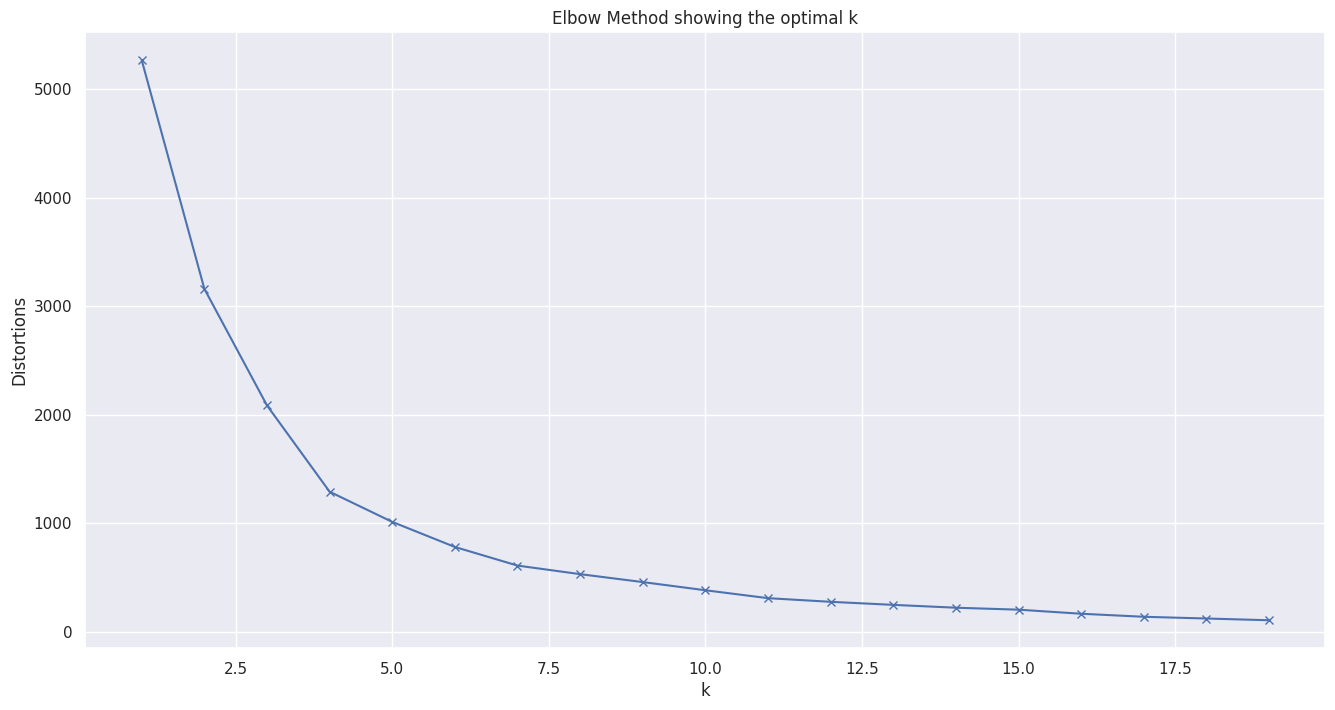

In [128]:
#Ellbow-Method --> Best Number of Clusters is 2
plt.figure(figsize = (16,8))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortions")
plt.title("Elbow Method showing the optimal k")
plt.annotate("", xy = (2,10000), xytext = (2,6000), arrowprops= dict(arrowstyle='->', color = 'red', lw = 2, mutation_scale = 15))
plt.show()


In [74]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_piv)
y_kmeans = kmeans.predict(data_piv)
y_kmeans

/home/neles/.cache/pypoetry/virtualenvs/test-w-UEnm5h-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [75]:
cluster_labels = kmeans.fit_predict(data_piv.values)
data_piv['cluster_label'] = cluster_labels

/home/neles/.cache/pypoetry/virtualenvs/test-w-UEnm5h-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_12401/685216981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_piv['cluster_label'] = cluster_labels


In [76]:
#PCA to reduce components and make it visible
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data_piv.values)
data_piv["pca_1"] = reduced_features[:,0]
data_piv["pca_2"] = reduced_features[:,1]

/tmp/ipykernel_12401/832574229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_piv["pca_1"] = reduced_features[:,0]
/tmp/ipykernel_12401/832574229.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_piv["pca_2"] = reduced_features[:,1]


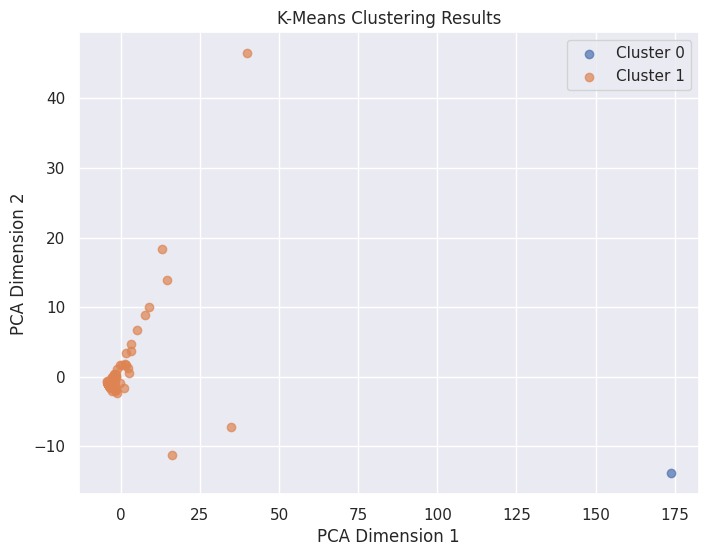

In [77]:
num_clusters=2
plt.figure(figsize=(8,6))
for cluster_label in range (num_clusters):
    plt.scatter(
        data_piv[data_piv['cluster_label'] == cluster_label]['pca_1'],
        data_piv[data_piv['cluster_label'] == cluster_label]['pca_2'],
        label=f'Cluster {cluster_label}',
        alpha = 0.7
    )
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

In [78]:
#Aus meiner Sicht haben wir da irgendwie ein Problem, oder? 
#Wenn zwei Cluster die beste Wahl sind aber alle außer einem Land blau sind wüsste ich nicht was ich da interpretieren soll 
#--> Gerne drüberschauen 

# Alternative

In [79]:
# Alternative Idee: kmeans kann das Time Series Konzept nicht verstehen bzw. die Relevanz der zeitlichen Entwicklung. Vorher war jede Spalte einfach eine eigene Variable.
# Dementsprechend hatten wir pro Land 155 Variablen die erstmal in keinem Zusammenhang stehen
# Version 2: Wir nehmen nur die aktuellsten fünf Jahre von jeden Land und berechnen den Durchschnitt für jede Variable und basieren darauf unser Clustering
# so wollen wir ein clustering errechnen, dass die aktuelle Realität der Länder wiederspiegelt und darauf basierend die optimale Anzahl an Cluster errechnet

In [129]:
data_piv

1992                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.367188 -0.230215 -0.359634 -0.167941  -0.239553   
Antigua and Barbuda -0.369019 -0.230710 -0.353878 -0.167941  -0.252744   
Argentina           -0.193978  0.136097 -0.233023 -0.167941  -0.113875   
Armenia             -0.369344 -0.231272 -0.356048 -0.167941  -0.238196   
Australia            0.138198  0.225621  0.096973  4.424576  -0.180565   
...                       ...       ...       ...       ...        ...   
Uruguay             -0.350712 -0.209228 -0.338115 -0.167941  -0.239940   
Vanuatu             -0.371081 -0.231126 -0.359567 -0.167941  -0.252355   
Venezuela           -0.220478 -0.144642 -0.230394 -0.167941  -0.167211   
Vietnam             -0.271789 -0.213426 -0.331411 -0.167941   0.036254   
Zambia              -0.360508 -0.226234 -0.349960 -0.167941  -0.219545   

                         1993                                           ...  \
Kind                  Exports       GDP   Imports   Nat_Dis Population  ...   
Country                                                                 ...   
Albania             -0.357065 -0.223016 -0.346618 -0.157677  -0.240060  ...   
Antigua and Barbuda -0.359650 -0.224245 -0.341905 -0.157677  -0.252984  ...   
Argentina           -0.169856  0.126042 -0.214580 -0.157677  -0.114146  ...   
Armenia             -0.360490 -0.223847 -0.343532 -0.157677  -0.239119  ...   
Australia            0.120196  0.185614  0.098936 -0.157677  -0.181160  ...   
...                       ...       ...       ...       ...        ...  ...   
Uruguay             -0.339502 -0.201079 -0.324732 -0.157677  -0.240287  ...   
Vanuatu             -0.361651 -0.224689 -0.347458 -0.157677  -0.252589  ...   
Venezuela           -0.227424 -0.145491 -0.220257 -0.157677  -0.166700  ...   
Vietnam             -0.267836 -0.202740 -0.317246 -0.157677   0.037723  ...   
Zambia              -0.351643 -0.220244 -0.338130 -0.157677  -0.219441  ...   

                         2021                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.318969 -0.223513 -0.309263 -0.168558  -0.257562   
Antigua and Barbuda -0.326137 -0.229401 -0.314078 -0.168558  -0.266225   
Argentina           -0.249016 -0.059740 -0.225292 -0.168558  -0.120539   
Armenia             -0.320552 -0.225069 -0.309994 -0.168558  -0.257628   
Australia            0.030389  0.345744  0.034924 -0.168558  -0.184660   
...                       ...       ...       ...       ...        ...   
Uruguay             -0.306632 -0.209174 -0.295884 -0.168558  -0.255604   
Vanuatu             -0.326517 -0.229586 -0.314904 -0.168558  -0.265505   
Venezuela           -0.286036 -0.209934 -0.226993 -0.168558  -0.176655   
Vietnam              0.000115 -0.100638  0.033713 -0.168558   0.044088   
Zambia              -0.318397 -0.222171 -0.303219  0.282762  -0.204466   

                         2022                                           
Kind                  Exports       GDP   Imports   Nat_Dis Population  
Country                                                                 
Albania             -0.325618 -0.224448 -0.312367 -0.136264  -0.258411  
Antigua and Barbuda -0.333448 -0.230185 -0.318285 -0.136264  -0.266933  
Argentina           -0.237741 -0.015203 -0.217415 -0.136264  -0.120311  
Armenia             -0.324208 -0.224110 -0.310235 -0.136264  -0.258395  
Australia            0.100818  0.349484  0.095247 -0.136264  -0.184678  
...                       ...       ...       ...       ...        ...  
Uruguay             -0.311380 -0.206250 -0.297783 -0.136264  -0.256354  
Vanuatu             -0.333766 -0.230418 -0.319002 -0.136264  -0.266193  
Venezuela           -0.295981 -0.199014 -

In [130]:
selected_columns = data_piv.loc[:, (slice(2017, 2022), ['Exports', 'GDP', 'Imports', 'Nat_Dis', 'Population'])]
selected_columns

2017                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.329668 -0.235700 -0.318299 -0.146444  -0.254653   
Antigua and Barbuda -0.336125 -0.240860 -0.322426 -0.146444  -0.263712   
Argentina           -0.208265  0.045242 -0.227235 -0.146444  -0.120599   
Armenia             -0.330002 -0.236380 -0.317908 -0.146444  -0.254723   
Australia            0.102668  0.373819  0.049287 -0.146444  -0.183930   
...                       ...       ...       ...       ...        ...   
Uruguay             -0.315615 -0.212878 -0.301415 -0.146444  -0.252866   
Vanuatu             -0.336718 -0.241121 -0.323187 -0.146444  -0.263064   
Venezuela           -0.285035 -0.189903 -0.209563 -0.146444  -0.164494   
Vietnam             -0.055974 -0.118115 -0.019038 -0.146444   0.042163   
Zambia              -0.325669 -0.229990 -0.311750 -0.146444  -0.207686   

                         2018                                           ...  \
Kind                  Exports       GDP   Imports   Nat_Dis Population  ...   
Country                                                                 ...   
Albania             -0.328044 -0.232427 -0.319659 -0.110846  -0.255301  ...   
Antigua and Barbuda -0.334436 -0.238013 -0.324225 -0.110846  -0.264275  ...   
Argentina           -0.218621 -0.022487 -0.233207 -0.110846  -0.120680  ...   
Armenia             -0.327986 -0.233539 -0.319510 -0.110846  -0.255398  ...   
Australia            0.090227  0.345471  0.055011 -0.110846  -0.183831  ...   
...                       ...       ...       ...       ...        ...  ...   
Uruguay             -0.315502 -0.212069 -0.304442 -0.104341  -0.253488  ...   
Vanuatu             -0.335148 -0.238292 -0.325023 -0.110846  -0.263610  ...   
Venezuela           -0.289122 -0.196618 -0.220498 -0.110846  -0.168118  ...   
Vietnam             -0.060051 -0.113162 -0.006626 -0.110846   0.042373  ...   
Zambia              -0.324592 -0.227828 -0.313323 -0.110846  -0.206891  ...   

                         2021                                           \
Kind                  Exports       GDP   Imports   Nat_Dis Population   
Country                                                                  
Albania             -0.318969 -0.223513 -0.309263 -0.168558  -0.257562   
Antigua and Barbuda -0.326137 -0.229401 -0.314078 -0.168558  -0.266225   
Argentina           -0.249016 -0.059740 -0.225292 -0.168558  -0.120539   
Armenia             -0.320552 -0.225069 -0.309994 -0.168558  -0.257628   
Australia            0.030389  0.345744  0.034924 -0.168558  -0.184660   
...                       ...       ...       ...       ...        ...   
Uruguay             -0.306632 -0.209174 -0.295884 -0.168558  -0.255604   
Vanuatu             -0.326517 -0.229586 -0.314904 -0.168558  -0.265505   
Venezuela           -0.286036 -0.209934 -0.226993 -0.168558  -0.176655   
Vietnam              0.000115 -0.100638  0.033713 -0.168558   0.044088   
Zambia              -0.318397 -0.222171 -0.303219  0.282762  -0.204466   

                         2022                                           
Kind                  Exports       GDP   Imports   Nat_Dis Population  
Country                                                                 
Albania             -0.325618 -0.224448 -0.312367 -0.136264  -0.258411  
Antigua and Barbuda -0.333448 -0.230185 -0.318285 -0.136264  -0.266933  
Argentina           -0.237741 -0.015203 -0.217415 -0.136264  -0.120311  
Armenia             -0.324208 -0.224110 -0.310235 -0.136264  -0.258395  
Australia            0.100818  0.349484  0.095247 -0.136264  -0.184678  
...                       ...       ...       ...       ...        ...  
Uruguay             -0.311380 -0.206250 -0.297783 -0.136264  -0.256354  
Vanuatu             -0.333766 -0.230418 -0.319002 -0.136264  -0.266193  
Venezuela           -0.295981 -0.199014 -

In [172]:
years = [2020, 2021, 2022]
average_df = pd.DataFrame()

# Durchschnitt über die ausgewählten Jahre für jede Variable
for variable in ['Exports', 'GDP', 'Imports', 'Nat_Dis', 'Population']:
    # Wir benutzen .loc zum Indizieren der Jahre und xs für das zweite Level des MultiIndex
    average_df[variable] = selected_columns.loc[:, (years, variable)].mean(axis=1)

average_df


,Exports,GDP,Imports,Nat_Dis,Population
Country,,,,,
Albania,-0.321694,-0.223827,-0.310611,-0.147146,-0.257581
Antigua and Barbuda,-0.328840,-0.229527,-0.315403,-0.147146,-0.266236
Argentina,-0.245736,-0.049994,-0.225012,-0.147146,-0.120522
Armenia,-0.321973,-0.224566,-0.310003,-0.147146,-0.257632
Australia,0.054264,0.335343,0.074965,-0.147146,-0.184377
Azerbaijan,-0.308669,-0.210109,-0.285965,-0.147146,-0.234226
"Bahamas, The",-0.325050,-0.225999,-0.312547,-0.147146,-0.265232
Bangladesh,-0.251684,-0.079762,-0.265489,-0.147146,0.273183
Barbados,-0.326920,-0.228235,-0.314699,-0.147146,-0.265637


In [173]:
average_df.loc["China, People's Republic of"]

Exports       2.832258
GDP           5.864131
Imports       3.248746
Nat_Dis       0.533729
Population    4.233975
Name: China, People's Republic of, dtype: float64

In [174]:
df_dropped = average_df.drop(labels=["China, People's Republic of"], axis=0)

In [175]:
df_dropped

,Exports,GDP,Imports,Nat_Dis,Population
Country,,,,,
Albania,-0.321694,-0.223827,-0.310611,-0.147146,-0.257581
Antigua and Barbuda,-0.328840,-0.229527,-0.315403,-0.147146,-0.266236
Argentina,-0.245736,-0.049994,-0.225012,-0.147146,-0.120522
Armenia,-0.321973,-0.224566,-0.310003,-0.147146,-0.257632
Australia,0.054264,0.335343,0.074965,-0.147146,-0.184377
Azerbaijan,-0.308669,-0.210109,-0.285965,-0.147146,-0.234226
"Bahamas, The",-0.325050,-0.225999,-0.312547,-0.147146,-0.265232
Bangladesh,-0.251684,-0.079762,-0.265489,-0.147146,0.273183
Barbados,-0.326920,-0.228235,-0.314699,-0.147146,-0.265637


In [176]:
from sklearn.cluster import KMeans

wcss = []
max_clusters = 50
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(average_df)
    wcss.append(kmeans.inertia_)

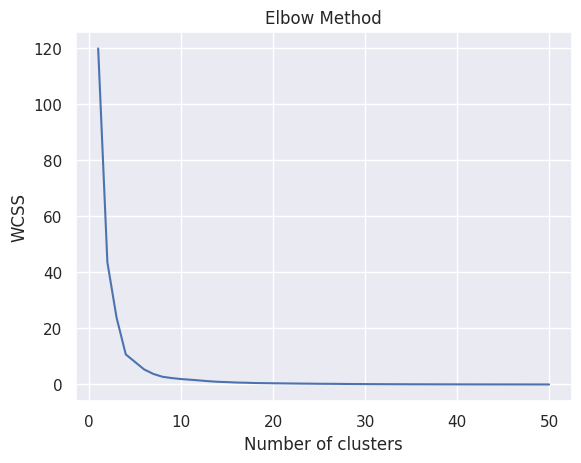

In [177]:
plt.plot(range(1, max_clusters+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [134]:
# Optimal number of clusters is the one that you decide based on the elbow plot
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(average_df)

In [135]:
average_df['Cluster'] = pred_y

In [139]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [178]:
from sklearn.cluster import KMeans

wcss = []
max_clusters = 50
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_dropped)
    wcss.append(kmeans.inertia_)

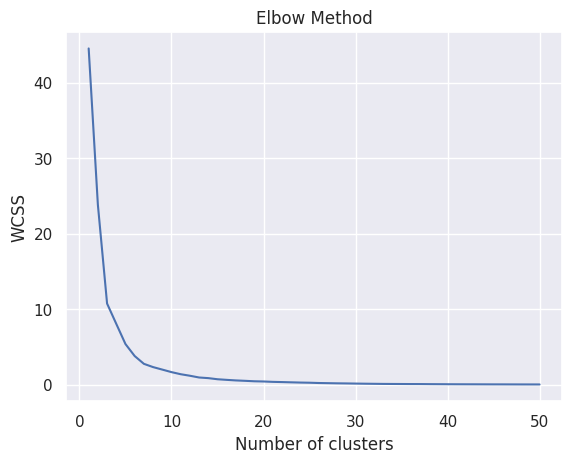

In [179]:
plt.plot(range(1, max_clusters+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [169]:
# Optimal number of clusters is the one that you decide based on the elbow plot
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_dropped)

In [170]:
df_dropped['Cluster'] = pred_y

In [171]:
df_dropped

,Exports,GDP,Imports,Nat_Dis,Population,Cluster
Country,,,,,,
Albania,-0.325195,-0.228168,-0.314922,-0.140532,-0.256450,0
Antigua and Barbuda,-0.332035,-0.233723,-0.319514,-0.140532,-0.265263,0
Argentina,-0.233915,-0.030347,-0.226992,-0.136137,-0.120594,1
Armenia,-0.325244,-0.228955,-0.314362,-0.140532,-0.256522,0
Australia,0.071628,0.340634,0.069869,-0.140532,-0.184102,0
Azerbaijan,-0.311031,-0.214827,-0.291049,-0.140532,-0.233331,0
"Bahamas, The",-0.327752,-0.229618,-0.316007,-0.140532,-0.264260,0
Bangladesh,-0.258702,-0.091874,-0.269174,-0.140532,0.268999,1
Barbados,-0.330240,-0.232337,-0.318678,-0.140532,-0.264660,0
